In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

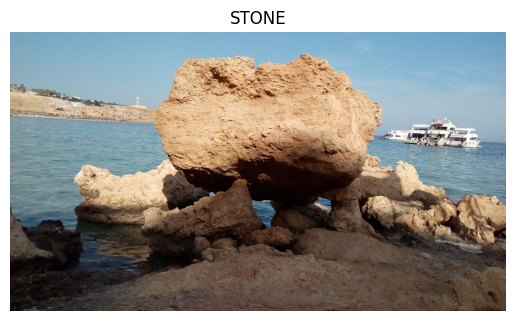

In [24]:
img1 = cv2.imread("stone.jpg")
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.title('STONE')
plt.show

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
edges_x = cv2.filter2D(gray, -1, kernel_x)
edges_y = cv2.filter2D(gray, -1, kernel_y)
edges = edges_x + edges_y
cv2.imshow('Sobel', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()



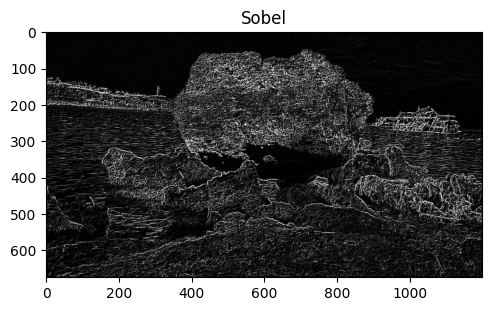

In [26]:
imshow('Sobel', edges)

In [27]:
canny = cv2.Canny(edges, 50, 150)
# Це взяте зображення з попереднього завдання Sobel 

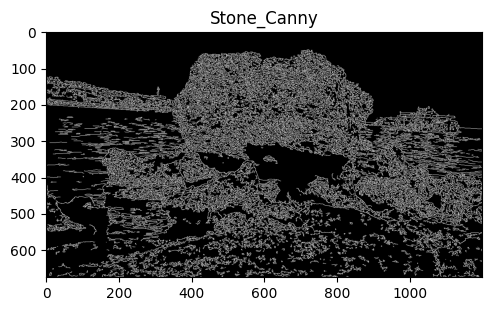

In [35]:
imshow('Stone_Canny', canny)

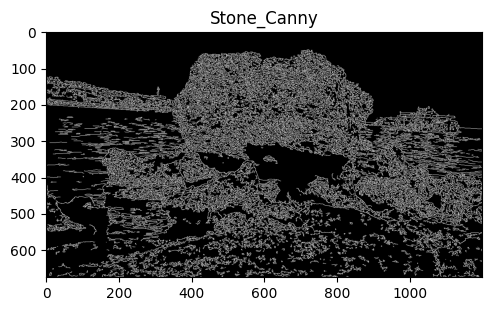

In [36]:
# Це взяте зображення grey перше для порівняння
canny = cv2.Canny(gray, 50, 150)
imshow('Stone_Canny', canny)

In [37]:
from scipy import ndimage 

In [16]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = gray.astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imshow("output.jpg",edged_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

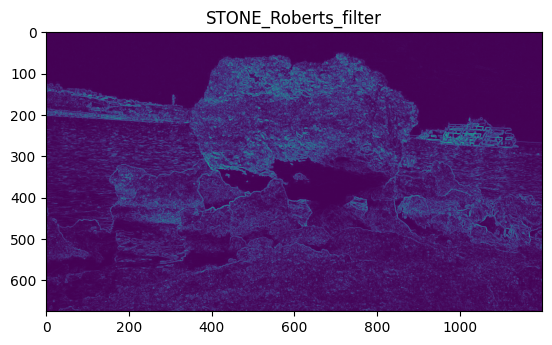

In [30]:
plt.imshow(edged_img)
plt.title('STONE_Roberts_filter')
plt.show

In [38]:
# Всі три фільтри дають різний візуальний результат, проте границі виділяють чітко, найчіткіше - Собель, Canny дає більш 
# гладкий перехід, і ще більш згладжений - Робертса (оператор Робертса сильно страждає на чутливість до шуму.)